In [1]:
import os
import pandas as pd
import numpy as np
import io
import requests
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping


path = "./data/"
    
filename = os.path.join(path,"iris.csv")    
df = pd.read_csv(filename,na_values=['NA','?'])


def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)

Using TensorFlow backend.


In [2]:
from sklearn import preprocessing

species = encode_text_index(df,"species")
x,y = to_xy(df,"species")

x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor=EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x,y,validation_data=(x_test,y_test),callbacks=[monitor], verbose=2, epochs=1000)


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 150 samples, validate on 38 samples
Epoch 1/1000
0s - loss: 1.5274 - val_loss: 1.6263
Epoch 2/1000
0s - loss: 1.4797 - val_loss: 1.5703
Epoch 3/1000
0s - loss: 1.4392 - val_loss: 1.5217
Epoch 4/1000
0s - loss: 1.4037 - val_loss: 1.4804
Epoch 5/1000
0s - loss: 1.3701 - val_loss: 1.4448
Epoch 6/1000
0s - loss: 1.3442 - val_loss: 1.4129
Epoch 7/1000
0s - loss: 1.3209 - val_loss: 1.3851
Epoch 8/1000
0s - loss: 1.3035 - val_loss: 1.3595
Epoch 9/1000
0s - loss: 1.2854 - val_loss: 1.3373
Epoch 10/1000
0s - loss: 1.2700 - val_loss: 1.3177
Epoch 11/1000
0s - loss: 1.2548 - val_loss: 1.3011
Epoch 12/1000
0s - loss: 1.2432 - val_loss: 1.2854
Epoch 13/1000
0s - loss: 1.2311 - val_loss: 1.2710
Epoch 14/1000
0s - loss: 1.2211 - val_loss: 1.2576
Epoch 15/1000
0s - loss: 1.2107 - val_loss: 1.2457
Epoch 16/1000
0s - loss: 1.2019 - val_loss: 1.2342
Ep

Epoch 162/1000
0s - loss: 0.6230 - val_loss: 0.6082
Epoch 163/1000
0s - loss: 0.6216 - val_loss: 0.6066
Epoch 164/1000
0s - loss: 0.6203 - val_loss: 0.6052
Epoch 165/1000
0s - loss: 0.6185 - val_loss: 0.6036
Epoch 166/1000
0s - loss: 0.6172 - val_loss: 0.6020
Epoch 167/1000
0s - loss: 0.6157 - val_loss: 0.6006
Epoch 168/1000
0s - loss: 0.6142 - val_loss: 0.5991
Epoch 169/1000
0s - loss: 0.6129 - val_loss: 0.5974
Epoch 170/1000
0s - loss: 0.6114 - val_loss: 0.5959
Epoch 171/1000
0s - loss: 0.6101 - val_loss: 0.5944
Epoch 172/1000
0s - loss: 0.6086 - val_loss: 0.5930
Epoch 173/1000
0s - loss: 0.6073 - val_loss: 0.5915
Epoch 174/1000
0s - loss: 0.6060 - val_loss: 0.5900
Epoch 175/1000
0s - loss: 0.6046 - val_loss: 0.5886
Epoch 176/1000
0s - loss: 0.6033 - val_loss: 0.5872
Epoch 177/1000
0s - loss: 0.6020 - val_loss: 0.5858
Epoch 178/1000
0s - loss: 0.6017 - val_loss: 0.5843
Epoch 179/1000
0s - loss: 0.5993 - val_loss: 0.5829
Epoch 180/1000
0s - loss: 0.5983 - val_loss: 0.5818
Epoch 181/10

0s - loss: 0.4590 - val_loss: 0.4321
Epoch 329/1000
0s - loss: 0.4579 - val_loss: 0.4312
Epoch 330/1000
0s - loss: 0.4570 - val_loss: 0.4302
Epoch 331/1000
0s - loss: 0.4561 - val_loss: 0.4293
Epoch 332/1000
0s - loss: 0.4553 - val_loss: 0.4284
Epoch 333/1000
0s - loss: 0.4543 - val_loss: 0.4275
Epoch 334/1000
0s - loss: 0.4535 - val_loss: 0.4266
Epoch 335/1000
0s - loss: 0.4527 - val_loss: 0.4257
Epoch 336/1000
0s - loss: 0.4520 - val_loss: 0.4248
Epoch 337/1000
0s - loss: 0.4509 - val_loss: 0.4239
Epoch 338/1000
0s - loss: 0.4505 - val_loss: 0.4231
Epoch 339/1000
0s - loss: 0.4495 - val_loss: 0.4222
Epoch 340/1000
0s - loss: 0.4484 - val_loss: 0.4213
Epoch 341/1000
0s - loss: 0.4475 - val_loss: 0.4205
Epoch 342/1000
0s - loss: 0.4467 - val_loss: 0.4196
Epoch 343/1000
0s - loss: 0.4458 - val_loss: 0.4187
Epoch 344/1000
0s - loss: 0.4448 - val_loss: 0.4178
Epoch 345/1000
0s - loss: 0.4441 - val_loss: 0.4170
Epoch 346/1000
0s - loss: 0.4431 - val_loss: 0.4161
Epoch 347/1000
0s - loss: 0

Epoch 500/1000
0s - loss: 0.3286 - val_loss: 0.2994
Epoch 501/1000
0s - loss: 0.3280 - val_loss: 0.2991
Epoch 502/1000
0s - loss: 0.3274 - val_loss: 0.2982
Epoch 503/1000
0s - loss: 0.3274 - val_loss: 0.2981
Epoch 504/1000
0s - loss: 0.3265 - val_loss: 0.2969
Epoch 505/1000
0s - loss: 0.3258 - val_loss: 0.2961
Epoch 506/1000
0s - loss: 0.3253 - val_loss: 0.2955
Epoch 507/1000
0s - loss: 0.3247 - val_loss: 0.2951
Epoch 508/1000
0s - loss: 0.3240 - val_loss: 0.2942
Epoch 509/1000
0s - loss: 0.3234 - val_loss: 0.2935
Epoch 510/1000
0s - loss: 0.3230 - val_loss: 0.2931
Epoch 511/1000
0s - loss: 0.3225 - val_loss: 0.2923
Epoch 512/1000
0s - loss: 0.3218 - val_loss: 0.2920
Epoch 513/1000
0s - loss: 0.3214 - val_loss: 0.2917
Epoch 514/1000
0s - loss: 0.3208 - val_loss: 0.2910
Epoch 515/1000
0s - loss: 0.3200 - val_loss: 0.2902
Epoch 516/1000
0s - loss: 0.3195 - val_loss: 0.2895
Epoch 517/1000
0s - loss: 0.3193 - val_loss: 0.2896
Epoch 518/1000
0s - loss: 0.3186 - val_loss: 0.2889
Epoch 519/10

In [3]:
import tensorflow as tf
from sklearn import metrics

pred = model.predict(x_test)
print(pred[0:5])



[[  5.30893914e-04   6.72661245e-01   3.26807767e-01]
 [  8.60727847e-01   1.30020529e-01   9.25159082e-03]
 [  1.64551397e-14   2.38246135e-02   9.76175368e-01]
 [  5.03026204e-05   5.64165950e-01   4.35783744e-01]
 [  1.96652749e-04   6.28245175e-01   3.71558130e-01]]


In [4]:
from keras.callbacks import ModelCheckpoint

species = encode_text_index(df,"species")
x,y = to_xy(df,"species")

x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=7, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath='best_weights.hdf5', verbose=0, save_best_only=True)
model.fit(x,y,validation_data=(x_test,y_test), callbacks=[monitor,checkpointer], verbose=2, epochs=1000 )
model.load_weights('best_weights.hdf5')

Train on 150 samples, validate on 38 samples
Epoch 1/1000
0s - loss: 1.5972 - val_loss: 1.7079
Epoch 2/1000
0s - loss: 1.5224 - val_loss: 1.6254
Epoch 3/1000
0s - loss: 1.4554 - val_loss: 1.5480
Epoch 4/1000
0s - loss: 1.3990 - val_loss: 1.4814
Epoch 5/1000
0s - loss: 1.3444 - val_loss: 1.4283
Epoch 6/1000
0s - loss: 1.3009 - val_loss: 1.3805
Epoch 7/1000
0s - loss: 1.2612 - val_loss: 1.3370
Epoch 8/1000
0s - loss: 1.2273 - val_loss: 1.2962
Epoch 9/1000
0s - loss: 1.1947 - val_loss: 1.2596
Epoch 10/1000
0s - loss: 1.1650 - val_loss: 1.2258
Epoch 11/1000
0s - loss: 1.1373 - val_loss: 1.1949
Epoch 12/1000
0s - loss: 1.1137 - val_loss: 1.1658
Epoch 13/1000
0s - loss: 1.0901 - val_loss: 1.1393
Epoch 14/1000
0s - loss: 1.0685 - val_loss: 1.1159
Epoch 15/1000
0s - loss: 1.0503 - val_loss: 1.0941
Epoch 16/1000
0s - loss: 1.0320 - val_loss: 1.0740
Epoch 17/1000
0s - loss: 1.0170 - val_loss: 1.0553
Epoch 18/1000
0s - loss: 1.0025 - val_loss: 1.0368
Epoch 19/1000
0s - loss: 0.9870 - val_loss: 1.

0s - loss: 0.1975 - val_loss: 0.1694
Epoch 161/1000
0s - loss: 0.1946 - val_loss: 0.1680
Epoch 162/1000
0s - loss: 0.1931 - val_loss: 0.1677
Epoch 163/1000
0s - loss: 0.1916 - val_loss: 0.1650
Epoch 164/1000
0s - loss: 0.1895 - val_loss: 0.1625
Epoch 165/1000
0s - loss: 0.1876 - val_loss: 0.1610
Epoch 166/1000
0s - loss: 0.1855 - val_loss: 0.1591
Epoch 167/1000
0s - loss: 0.1839 - val_loss: 0.1573
Epoch 168/1000
0s - loss: 0.1821 - val_loss: 0.1557
Epoch 169/1000
0s - loss: 0.1805 - val_loss: 0.1542
Epoch 170/1000
0s - loss: 0.1790 - val_loss: 0.1530
Epoch 171/1000
0s - loss: 0.1773 - val_loss: 0.1514
Epoch 172/1000
0s - loss: 0.1769 - val_loss: 0.1494
Epoch 173/1000
0s - loss: 0.1748 - val_loss: 0.1478
Epoch 174/1000
0s - loss: 0.1725 - val_loss: 0.1464
Epoch 175/1000
0s - loss: 0.1709 - val_loss: 0.1451
Epoch 176/1000
0s - loss: 0.1695 - val_loss: 0.1440
Epoch 177/1000
0s - loss: 0.1682 - val_loss: 0.1434
Epoch 178/1000
0s - loss: 0.1679 - val_loss: 0.1407
Epoch 179/1000
0s - loss: 0

0s - loss: 0.0800 - val_loss: 0.0577
Epoch 323/1000
0s - loss: 0.0803 - val_loss: 0.0583
Epoch 324/1000
0s - loss: 0.0798 - val_loss: 0.0569
Epoch 325/1000
0s - loss: 0.0793 - val_loss: 0.0571
Epoch 326/1000
0s - loss: 0.0790 - val_loss: 0.0577
Epoch 327/1000
0s - loss: 0.0790 - val_loss: 0.0581
Epoch 328/1000
0s - loss: 0.0789 - val_loss: 0.0577
Epoch 329/1000
0s - loss: 0.0783 - val_loss: 0.0558
Epoch 330/1000
0s - loss: 0.0785 - val_loss: 0.0554
Epoch 331/1000
0s - loss: 0.0787 - val_loss: 0.0553
Epoch 332/1000
0s - loss: 0.0786 - val_loss: 0.0572
Epoch 333/1000
0s - loss: 0.0782 - val_loss: 0.0570
Epoch 334/1000
0s - loss: 0.0784 - val_loss: 0.0547
Epoch 335/1000
0s - loss: 0.0773 - val_loss: 0.0551
Epoch 336/1000
0s - loss: 0.0773 - val_loss: 0.0555
Epoch 337/1000
0s - loss: 0.0778 - val_loss: 0.0565
Epoch 338/1000
0s - loss: 0.0770 - val_loss: 0.0554
Epoch 339/1000
0s - loss: 0.0772 - val_loss: 0.0550
Epoch 340/1000
0s - loss: 0.0768 - val_loss: 0.0535
Epoch 341/1000
0s - loss: 0

In [5]:
pred = np.argmax(pred,axis=1)
print(pred)

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [6]:
y_compare=np.argmax(y_test,axis=1)
score=metrics.accuracy_score(y_compare,pred)
print('the Accuracy Score is {}'.format(score))

the Accuracy Score is 0.9736842105263158


In [7]:
from IPython.display import display
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

pred=model.predict(x_test)
print("Numpy array of predictions")
print(pred[0]*100)

print("As percent probability")
display(pred[0:5])

score=metrics.log_loss(y_test,pred)
print('The Log Loss score {}'.format(score))

Numpy array of predictions
[  0.0494  95.591    4.3595]
As percent probability


array([[ 0.0005,  0.9559,  0.0436],
       [ 0.9974,  0.0026,  0.    ],
       [ 0.    ,  0.0003,  0.9997],
       [ 0.0005,  0.8938,  0.1057],
       [ 0.0004,  0.9693,  0.0303]], dtype=float32)

The Log Loss score 0.050843220379503784


C:\Users\rahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


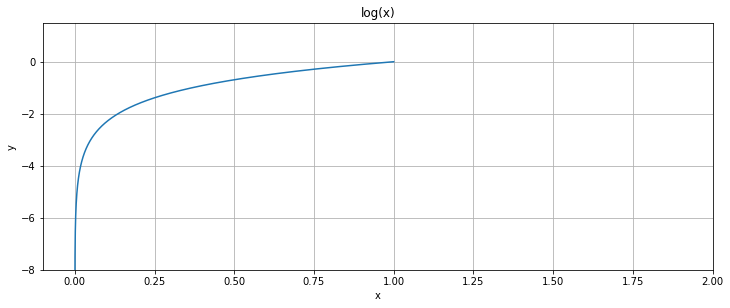

In [8]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import sin, pi, arange


t=arange(0.0,1.0,0.00001)
fig=figure(1,figsize=(12,10))
ax1=fig.add_subplot(211)
ax1.plot(t,np.log(t))
ax1.grid(True)
ax1.set_ylim((-8, 1.5))
ax1.set_xlim((-0.1, 2))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('log(x)')
show()

In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

path = "./data/"

filename_read = os.path.join(path,"auto-mpg.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)

cars = df['name']
df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')
x,y = to_xy(df,"mpg")
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

model=Sequential()
model.add(Dense(10,input_dim=x.shape[1],activation='relu'))
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x,y,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 398 samples, validate on 100 samples
Epoch 1/1000
0s - loss: 40549.2783 - val_loss: 298.9359
Epoch 2/1000
0s - loss: 5034.8022 - val_loss: 4245.0559
Epoch 3/1000
0s - loss: 1251.0944 - val_loss: 772.3616
Epoch 4/1000
0s - loss: 704.5763 - val_loss: 141.4058
Epoch 5/1000
0s - loss: 170.0515 - val_loss: 176.6356
Epoch 6/1000
0s - loss: 133.6015 - val_loss: 110.8262
Epoch 7/1000
0s - loss: 122.5023 - val_loss: 87.7430
Epoch 8/1000
0s - loss: 112.9379 - val_loss: 87.8483
Epoch 9/1000
0s - loss: 109.3203 - val_loss: 88.5815
Epoch 10/1000
0s - loss: 109.9569 - val_loss: 86.4964
Epoch 11/1000
0s - loss: 108.6625 - val_loss: 86.2154
Epoch 12/1000
0s - loss: 108.1217 - val_loss: 86.4120
Epoch 13/1000
0s - loss: 107.7531 - val_loss: 85.0086
Epoch 14/1000
0s - loss: 106.8036 - val_loss: 85.2011
Epoch 15/1000
0s - loss: 106.4683 - val_loss: 83.8949
Epoch 16/1000
0s - loss: 105.5997 - val_loss: 84.5968
Epoch 17/1000
0s - loss: 105.9625 - val_loss: 82.8928
Epoch 18/1000
0s - loss: 104.1290 

0s - loss: 29.2232 - val_loss: 23.2536
Epoch 160/1000
0s - loss: 30.6664 - val_loss: 23.1426
Epoch 161/1000
0s - loss: 30.5753 - val_loss: 22.8813
Epoch 162/1000
0s - loss: 30.0652 - val_loss: 24.1833
Epoch 163/1000
0s - loss: 29.8365 - val_loss: 25.3662
Epoch 164/1000
0s - loss: 27.7280 - val_loss: 26.7799
Epoch 165/1000
0s - loss: 27.7709 - val_loss: 21.8562
Epoch 166/1000
0s - loss: 28.4948 - val_loss: 22.4689
Epoch 167/1000
0s - loss: 27.1511 - val_loss: 21.4182
Epoch 168/1000
0s - loss: 26.8504 - val_loss: 21.4853
Epoch 169/1000
0s - loss: 27.6430 - val_loss: 24.8912
Epoch 170/1000
0s - loss: 28.8525 - val_loss: 20.7471
Epoch 171/1000
0s - loss: 26.3165 - val_loss: 21.5974
Epoch 172/1000
0s - loss: 26.1628 - val_loss: 24.8967
Epoch 173/1000
0s - loss: 26.7124 - val_loss: 20.0761
Epoch 174/1000
0s - loss: 25.3080 - val_loss: 21.6813
Epoch 175/1000
0s - loss: 25.5181 - val_loss: 22.9930
Epoch 176/1000
0s - loss: 26.3888 - val_loss: 19.8633
Epoch 177/1000
0s - loss: 24.9384 - val_los

In [11]:
pred=model.predict(x_test)

score=metrics.mean_squared_error(pred,y_test)
print('Final Score MSE {}'.format(score))

Final Score MSE 14.297036170959473


In [12]:
score=np.sqrt(score)
print('RMSE score is {}'.format(score))

RMSE score is 3.781142234802246


In [24]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation

path ='./data/'

filename_read=os.path.join(path,'auto-mpg.csv')
filename_write=os.path.join(path,'mod4-2_test.csv')
df=pd.read_csv(filename_read,na_values=['NA','?'])

#Shuffle
np.random.seed(42)
df=df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True,drop=True)

#Preprocess
cars=df['name']
df.drop('name',1,inplace=True)
missing_median(df,'horsepower')

#2D matrix
x,y=to_xy(df,'mpg')

#Cross_Validate
kf=KFold(5)

oos_y=[]
oos_pred=[]
fold=0
for train, test in kf.split(x):
    fold+=1
    print('Fold #{}',format(fold))
    
    x_train=x[train]
    y_train=y[train]
    x_test=x[test]
    y_test=y[test]
    
    model=Sequential()
    model.add(Dense(20, input_dim=x.shape[1],activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    monitor=EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,verbose=1,mode='auto')
    model.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[monitor],verbose=0,epochs=1000)
    
    pred=model.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)
    
    #Measure this fold's RMSE
    score=np.sqrt(metrics.mean_squared_error(pred,y_test))
    print('Fold score (RMSE) is {}'.format(score))

#Build the oos prediction list and calculate the error
oos_y=np.concatenate(oos_y)
oos_pred=np.concatenate(oos_pred)
score=np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print("Final out-of-sample score (RMSE): {}".format(score))


#Cross_validation prediction
oos_y=pd.DataFrame(oos_y)
oos_pred=pd.DataFrame(oos_pred)
oosDF=pd.concat([df,oos_y,oos_pred],axis=1)
oosDF.to_csv(filename_write, index=False)


Fold #{} 1
Epoch 00255: early stopping
Fold score (RMSE) is 8.586132049560547
Fold #{} 2
Epoch 00565: early stopping
Fold score (RMSE) is 4.011175632476807
Fold #{} 3
Epoch 00448: early stopping
Fold score (RMSE) is 4.94875955581665
Fold #{} 4
Epoch 00031: early stopping
Fold score (RMSE) is 15.436417579650879
Fold #{} 5
Epoch 00406: early stopping
Fold score (RMSE) is 3.913360357284546
Final out-of-sample score (RMSE): 8.562261581420898


In [20]:
oos_y

,0
0,33.000000
1,28.000000
2,19.000000
3,13.000000
4,14.000000
5,27.000000
6,24.000000
7,13.000000
8,17.000000
9,21.000000


In [21]:
oosDF


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,0,0
0,33.0,4,91.0,53.0,1795,17.4,76,3,33.000000,21.792652
1,28.0,4,120.0,79.0,2625,18.6,82,1,28.000000,30.394543
2,19.0,6,232.0,100.0,2634,13.0,71,1,19.000000,11.022930
3,13.0,8,318.0,150.0,3940,13.2,76,1,13.000000,14.737759
4,14.0,8,318.0,150.0,4237,14.5,73,1,14.000000,20.459072
5,27.0,4,97.0,88.0,2100,16.5,72,3,27.000000,19.457409
6,24.0,4,140.0,92.0,2865,16.4,82,1,24.000000,29.817959
7,13.0,8,440.0,215.0,4735,11.0,73,1,13.000000,2.726604
8,17.0,8,260.0,110.0,4060,19.0,77,1,17.000000,32.792171
9,21.0,6,200.0,93.5,2875,17.0,74,1,21.000000,20.673367


In [22]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,33.0,4,91.0,53.0,1795,17.4,76,3
1,28.0,4,120.0,79.0,2625,18.6,82,1
2,19.0,6,232.0,100.0,2634,13.0,71,1
3,13.0,8,318.0,150.0,3940,13.2,76,1
4,14.0,8,318.0,150.0,4237,14.5,73,1
5,27.0,4,97.0,88.0,2100,16.5,72,3
6,24.0,4,140.0,92.0,2865,16.4,82,1
7,13.0,8,440.0,215.0,4735,11.0,73,1
8,17.0,8,260.0,110.0,4060,19.0,77,1
9,21.0,6,200.0,93.5,2875,17.0,74,1
